# Comparison of methods for numerical integration of given functions
From __A Guide to Monte Carlo Simulations in Statistical Physics__, Landau & Binder. Chapter 3.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [3]:
plt.rcParams['figure.figsize'] = (9, 6)

## Simple methods: _mapping randomly_

Another simple Monte Carlo method is called the "_crude method_". It consists in choosing $N$ random values for $x$ between $a$ and $b$, later evaluate $f(x)$ for each value of $x$ to approximate the integral using the mean.

\begin{equation}\label{1}
    y_{est}=\frac{1}{N}\sum_i f(x_i)
\end{equation}

where, the values of $x$ which are chosen increases and, again, $y_{est}$ converges to the real value of $y$ as $N\to \infty$. 

A simple variation for this method, one can divide the interval into a set of unequal sub-intervals and perform Monte Carlo integration in each one. A note for this method is that having a region where the function $f(x)$ is large the sampling can be extensive and less effort can be expended on those sub-intervals over which the function is small.

### Example: Estimating the value of $\pi$

In the previous notebook we derived curve $f(x)$ from the parametric ecuation for the circle setting $r=1$ and the value of $\pi$ using the integral from $0$ to $1$.

\begin{align}\label{2}
    f(x) &=\sqrt{1-x^2}\\
    \pi &=4\int_0^1f(x)dx \label{3}
\end{align}

So, substituting \eqref{1} in \eqref{3}

\begin{align}\label{4}
    \pi=\frac{4}{N}\sum_i f(x),\quad\ x\in U(0,1)
\end{align}






In [4]:
f = lambda x: np.sqrt(1-x**2)

- #### Generate N points between $a$ to $b$ for the $x$-__axis__.

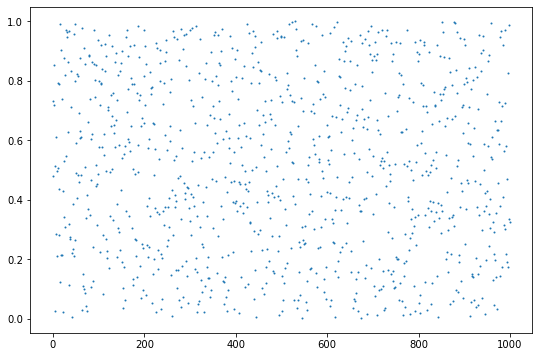

In [67]:
def number_generator(N, x_lims):
    xx = np.random.uniform(x_lims[0], x_lims[1], size=N)
    return xx

N = 1000; x_lims = [0,1]; 
X_r = number_generator(N, x_lims); 

plt.scatter(np.arange(0,N), X_r, s=1)
# plt.axis('scaled'); 
plt.show()

- #### Evaluate $f(x)$ for each value $x$ randomly sampled.

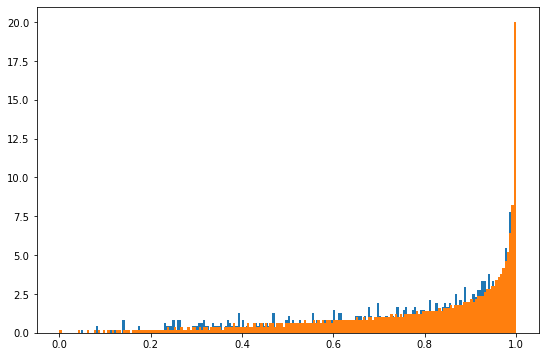

In [70]:
Y_r=f(X_r)

X = np.linspace(0,1,1000); Y = f(X)

plt.hist(Y_r, bins=200, density=True)
plt.hist(Y, bins=200, density=True)
# plt.axis('scaled'); 
plt.show()

We can clearly see that the distribution of $f(x_i)$ (randomly evaluated) aproximates to the distribution of function $f(x)$.

- #### Estimate the value of $y_{est}$ for $N$ random points.

In [72]:
def estimate_int(N, x_lims, f):
    X_r = number_generator(N, x_lims)
    Y_r = f(X_r)
    int_est = np.sum(Y_r)/N
    return X_r, Y_r, int_est

- #### Concatenate all previous functions to make a complete model

In [29]:
def crude_method(N, x_lims, f):
    X_r, Y_r, int_est = estimate_int(N, x_lims, f)
    pi_est = 4*int_est
    return X_r, Y_r, pi_est

In [30]:
# %timeit hit_or_miss(100000, [0, 1], [0, 1], f)    #timing the whole process

In [83]:
N = 1000000; x_lims = [0,1]; 
f = lambda x: np.sqrt(1-x**2)

X_r, Y_r, pi_est = crude_method(N, x_lims, f)

- #### Plot $f(x)$ and give the estimation for $\pi$ given $N$.

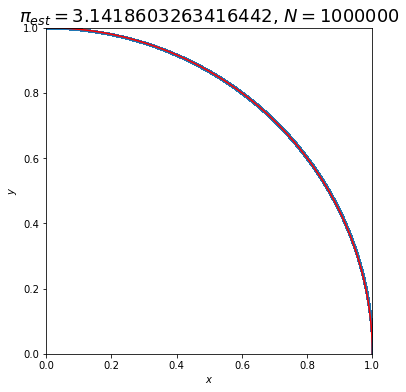

In [76]:
X = np.linspace(0,1,10000); Y = f(X)

plt.plot(X,Y, "red")
plt.scatter(X_r, Y_r, s=1);
# plt.scatter(X_r,-Y_r*hits, s=0.5);

label = r"$\pi_{est}=$" + str(pi_est) + r", $N=$" + str(N)
plt.axis('scaled'); plt.xlim(0,1); plt.ylim(0,1); 
plt.title(label, fontsize=18)
plt.xlabel(r"$x$"); plt.ylabel(r"$y$")
plt.show()


- #### Estimates of $\pi$ for different values of $N$.

In [118]:
N = np.array([int(2**(i)) for i in range(2,29)], dtype="int")
x_lims = [0,1]; f = lambda x: np.sqrt(1-x**2)
pi = []

for i in range(len(N)):    
    _, _, pi_est = crude_method(N[i], x_lims, f)
    pi.append(pi_est)
pi = np.array(pi)

In [119]:
pd.DataFrame(data=np.array([N, pi]).T, columns=["$N$", "$\pi$"])

,$N$,$\pi$
0,4.0,3.598727
1,8.0,2.680386
2,16.0,3.229261
3,32.0,2.810568
4,64.0,3.106586
5,128.0,3.180546
6,256.0,3.022399
7,512.0,3.083752
8,1024.0,3.107868
9,2048.0,3.147851


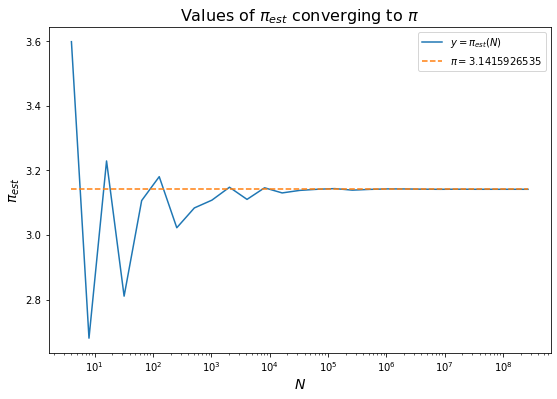

In [120]:
real_pi = 3.1415926535

plt.plot(N, pi, label=r"$y=\pi_{est}(N)$")
plt.plot(N, pi*0+real_pi, "--", label=r"$\pi=3.1415926535$")
plt.xscale("log")

# plt.axis('scaled'); 
plt.xlabel("$N$", fontsize=14); plt.ylabel("$\pi_{est}$", fontsize=14), 
plt.legend()
plt.title("Values of $\pi_{est}$ converging to $\pi$", fontsize=16)
plt.show()

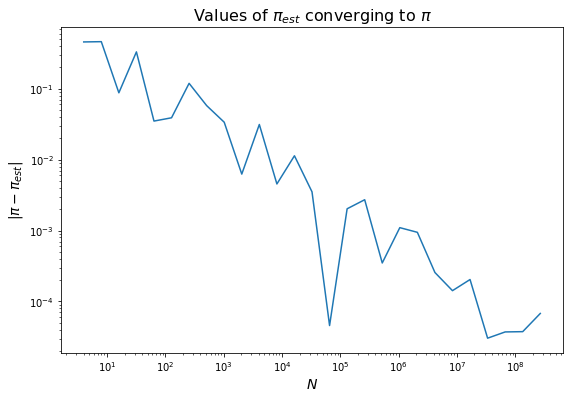

In [121]:
plt.plot(N, np.abs(pi-real_pi), label=r"$y=\pi_{est}(N)$")
plt.xscale("log");
plt.yscale("log")

# plt.axis('scaled'); 
plt.xlabel("$N$", fontsize=14); plt.ylabel("$|\pi-\pi_{est}|$", fontsize=14), 
plt.title("Values of $\pi_{est}$ converging to $\pi$", fontsize=16)
plt.show()